# **Сравнительный анализ вакансий Аналитиков данных и Системных аналитиков**


### **Описание: Анализ данных вакансий HH.ru** 


### **Цель проекта: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.**

### Задачи проекта
1. Выявление грейда требуемых специалистов
2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
3. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
4. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
Формулирование выводов и рекомендаций.


Ссылка на датасет: https://disk.yandex.ru/d/eA4zuI8qPag-KQ

### **Ход исследования:**

**1. Выгрузка данных**

**2. Предобработка данных**

**3. Исследовательский анализ данных**

**4. Определить грейд требуемых специалистов**

**5. Определить долю грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системных аналитиков**

**6. Найти типичное место работы для Аналитика данных и для Системны аналитков**

**7. ОБЩИЙ ВЫВОД**


**Описание данных:**

**id** - Уникальный идентификатор вакансии.

**name** - Название вакансии.

**published_at** - Дата публикации.

**alternate_url** - Ссылка на вакансию.

**type** - Статус вакансии на момент получения данных от api и передачи
их в базу.

**employer** - Работодатель.

**department** - Работодатель, отдел.

**area** - Регион места работы.

**experience** - Требуемый опыт работы.

**key_skills** - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.

**schedule** - График работы.

**employment** - Тип занятости.

**description** - Описание вакансии.

**description_lemmatized** - Лемматизированное описание вакансии.

**salary_from** - Нижняя граница предлагаемой заработной платы.

**salary_to** - Верхняя граница предлагаемой заработной платы.

**salary_bin** - Категория зарплаты.

**key_skills_from_key_skills_field** - Ключевые навыки из поля вакансии
key_skills.

**hard_skills_from_description** - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api.

**soft_skills_from_description** - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

### **Выгрузка данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_sa = pd.read_excel('vacancies_sa.xlsx')

In [3]:
data_sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [4]:
data_da = pd.read_excel('vacancies_da (1).xlsx')

In [5]:
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [6]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [7]:
data_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

Таблицы с данными вакансий по Аналитику данных и Системному аналитику содержат одинаковые столбцы.

### **Предобработка данных**

In [8]:
sorted(list(set(data_sa['salary_bin'].unique())))

['Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч']

In [9]:
sorted(list(set(data_da['salary_bin'].unique())))

['Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч']

Менять тип данных не имеет смысла

Для объединения таблиц вводим тип: аналитик данных или системный аналитик 

In [10]:
data_sa ['type_vacansy'] = 'sistem_analyst'

In [11]:
data_da ['type_vacansy'] = 'data_analyst'

In [12]:
all_data = pd.concat([data_sa, data_da])

In [13]:
all_data.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,type_vacansy
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,sistem_analyst
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,sistem_analyst
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация,sistem_analyst
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",...,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,sistem_analyst
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",...,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,sistem_analyst


In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null   obj

In [15]:
all_data.duplicated().sum()

0

Все строки из двух таблиц вошли, явных дубликатов нет

Посмотрим количество неявных дубликатов

In [16]:
len(all_data[all_data.duplicated(
    ['name', 'type', 'employer', 'department', 'area', 'experience', 'key_skills', 'schedule', 'employment', 'description', 'description_lemmatized',
     'salary_from', 'salary_to', 'salary_bin', 'key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description'])])

217

In [17]:
all_data[all_data.duplicated(subset = 
    ['name', 'type', 'employer', 'department', 'area', 'experience', 'key_skills', 'schedule', 'employment', 'description', 'description_lemmatized',
     'salary_from', 'salary_to', 'salary_bin', 'key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description'],
     keep = False)].sort_values(by = ['name', 'employer', 'area', 'experience', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,type_vacansy
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,data_analyst
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,data_analyst
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,data_analyst
528,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,data_analyst
1320,97741410,Data Analyst,2024-04-23 16:32:21,https://hh.ru/vacancy/97741410,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,data_analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,96494928,Старший аналитик данных (маркетинг),2024-04-09 09:38:57,https://hh.ru/vacancy/96494928,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Middle (3-6 years),"['SQL', 'Python', 'Маркетинг, реклама, PR', 'М...",...,Полная занятость,чем предстоит заниматься: отслеживать и собир...,предстоять заниматься отслеживать собирать раз...,NaN,NaN,ЗП не указана,"Маркетинг, реклама, PR, аналитика данных, Pyth...",Pandas,NaN,data_analyst
819,95548988,Урбан-аналитик данных,2024-03-26 15:33:29,https://hh.ru/vacancy/95548988,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,data_analyst
1747,99737480,Урбан-аналитик данных,2024-06-08 17:13:09,https://hh.ru/vacancy/99737480,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,data_analyst
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,data_analyst


Возможно организации, выставляя одну и ту же вакансию в разное время, преследуют определенную цель. Поэтому удалять неявные дубликаты не буду.

In [18]:
all_data.duplicated(subset = 'id').sum()

5

In [19]:
id_duplicated = all_data[all_data.duplicated(subset = 'id')]['id']

In [20]:
all_data.query('id in @ id_duplicated').sort_values(by = ['id', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,type_vacansy
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,data_analyst
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,sistem_analyst
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,data_analyst
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,sistem_analyst
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,data_analyst
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,sistem_analyst
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,data_analyst
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,sistem_analyst
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,data_analyst
33,100581831,Системн

У продублированных вакансий разный тип вакансий

In [21]:
all_data['name'].nunique()

1574

In [22]:
all_data['name'].value_counts().head(10)

name
Системный аналитик            568
Аналитик данных               463
Data Analyst                   84
Системный аналитик 1С          62
Ведущий системный аналитик     50
Ведущий аналитик данных        30
Системный аналитик DWH         25
Data analyst                   25
Старший системный аналитик     24
Старший аналитик данных        23
Name: count, dtype: int64

Топ-10 уникальных названий вакансий

In [23]:
all_data['employer'].nunique()

1358

In [24]:
all_data['employer'].value_counts().head(10)

employer
СБЕР                         338
Т1                           106
Aston                         66
WILDBERRIES                   51
Ozon                          40
ПСБ (ПАО «Промсвязьбанк»)     40
Совкомбанк Технологии         37
МТС                           36
Банк ВТБ (ПАО)                33
МАГНИТ, Розничная сеть        27
Name: count, dtype: int64

Топ-10 уникальных работодателей

In [25]:
all_data['area'].nunique()

106

In [26]:
all_data['area'].value_counts().head(10)

area
Москва             2381
Санкт-Петербург     404
Екатеринбург        111
Новосибирск          82
Казань               80
Нижний Новгород      66
Краснодар            51
Владивосток          42
Самара               40
Ростов-на-Дону       34
Name: count, dtype: int64

Топ-10 городов с опубликованными вакансиями

In [27]:
all_data['experience'].nunique()

4

In [28]:
all_data['experience'].value_counts().head(10)

experience
Junior+ (1-3 years)      1943
Middle (3-6 years)       1488
Junior (no experince)     228
Senior (6+ years)          57
Name: count, dtype: int64

4 группы в зависимости от опыта работы

In [29]:
all_data['salary_bin'].nunique()

5

In [30]:
all_data['salary_bin'].value_counts().head(10)

salary_bin
ЗП не указана                3209
От 100 тысяч до 200 тысяч     171
От 200 тысяч до 300 тысяч     117
Больше 300 тысяч              110
Меньше 100 тысяч              109
Name: count, dtype: int64

In [31]:
all_data['key_skills_from_key_skills_field'].nunique()

1795

In [32]:
all_data['key_skills_from_key_skills_field'].value_counts().head(10)

key_skills_from_key_skills_field
SQL, Python                                                                                                                                                                                                                                                                                                                                                                                                                                            35
UML, BPMN, SQL, REST, SOAP, RabbitMQ, Kafka                                                                                                                                                                                                                                                                                                                                                                                                            16
SQL                                                                                

Топ-10 уникальных значений ключевых навыков

**Вывод:**
1. Наиболее часто встречаются названия в вакансиях Системный аналитик и Аналитик данных.
2. Наибольшее количество вакансий предлагает Сбер и Т1
3. Больше всего вакансий в Москве.
4. Наиболее востребованы специалисты уровня Junior+ с опытом работы 1-3 года и Middle (3-6 лет)
5. В подавляющем большинстве случаев зарплата не указана
6. Ключевые навыки - SQL и Pyton

In [33]:
all_data.key_skills.unique().sum()

"['1С', 'Аналитический склад ума', 'confluence', 'SQL']['Разработка технических заданий', 'Бизнес-анализ', 'Английский язык', 'REST', 'Atlassian Jira', 'Сбор и анализ информации', 'Документация', 'Деловая коммуникация', 'UML', 'BPMN', 'API', 'Системный анализ', 'Atlassian Confluence']['Документация']['ERP', 'Atlassian Jira', '1С: Управление Производственным Предприятием', 'confluence', '1С: Управление Торговлей', 'ERP-системы на базе 1С', 'Коммуникация', '1С: Предприятие: Розница', 'Atlassian Confluence']['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', 'Java', 'CSS', 'C#']['MS SQL', 'Документация', 'ЦФТ', 'BPMN']['Системный анализ', '1С ERP Битфинанс', 'Документация', '1С ERP']['JSON', 'REST', 'SQL', 'XML', 'SOAP', 'Документация', 'Деловая коммуникация', 'UML', 'confluence', 'BPMN', 'API', 'Системный анализ', 'Аналитическое мышление', 'Проактивность', 'Xsd']['Маркшейдерия', 'Datamine', 'AutoCAD', 'Опытный пользователь ПК', 'Surpac', 'Micromine', 'Анализ данных', 'Аналитика', 'Геотехнология

В полях hard_skills_from_description и soft_skills_from_description отсутствует большое количество навыков. Для создания этих полей на основе поля key_skills можно использовать алгоритм.

In [34]:
def custom_split(s):
    s= s.strip("[]")
    items = [item.strip().strip("'").lower() for item in s.split(",") if item !='']
    return items

In [35]:
def extract_skills (key_skills):
    skills_list = key_skills.lower().split(', ')
    return skills_list


In [36]:
all_data['hard_skills'] = all_data['key_skills'].apply(extract_skills)

In [37]:
all_data['soft_skills'] = all_data['key_skills'].apply(extract_skills)

In [38]:
print(all_data['hard_skills'])

0       [['1с', 'аналитический склад ума', 'confluence...
1       [['разработка технических заданий', 'бизнес-ан...
2                                      [['документация']]
3       [['erp', 'atlassian jira', '1с: управление про...
4       [['json', 'sql', 'xml', 'soap', 'html', 'js', ...
                              ...                        
1796    [['проактивность', 'коммуникация', 'sql', 'ad-...
1797    [['грамотная речь', 'сводные таблицы', 'сбор и...
1798    [['анализ данных', 'sql', 'ms power bi', 'pyth...
1799    [['анализ данных', 'sql', 'ms power bi', 'pyth...
1800    [['анализ данных', 'sql', 'ms power bi', 'pyth...
Name: hard_skills, Length: 3716, dtype: object


In [39]:
print(all_data['soft_skills'])

0       [['1с', 'аналитический склад ума', 'confluence...
1       [['разработка технических заданий', 'бизнес-ан...
2                                      [['документация']]
3       [['erp', 'atlassian jira', '1с: управление про...
4       [['json', 'sql', 'xml', 'soap', 'html', 'js', ...
                              ...                        
1796    [['проактивность', 'коммуникация', 'sql', 'ad-...
1797    [['грамотная речь', 'сводные таблицы', 'сбор и...
1798    [['анализ данных', 'sql', 'ms power bi', 'pyth...
1799    [['анализ данных', 'sql', 'ms power bi', 'pyth...
1800    [['анализ данных', 'sql', 'ms power bi', 'pyth...
Name: soft_skills, Length: 3716, dtype: object


In [40]:
all_data[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].isna().mean()*100

key_skills_from_key_skills_field    36.302476
hard_skills_from_description        73.412271
soft_skills_from_description        45.775027
dtype: float64

Процент незаполненных навыков меньше всего в столбце ключевых навыков, поэтому в дальнейшем анализе будем использовать его.

## **Исследовательский анализ данных**

**Определить грейд требуемых специалистов.**

In [41]:
all_experience = all_data['experience'].unique()
sorted(all_experience)

['Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)']

В исследовании 4 грейда специалистов: Junior, Junior+, Middle, Senior

**Определить долю грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системных аналитиков**

In [42]:
d_a = all_data.loc[all_data['type_vacansy'] == 'data_analyst']['experience'].value_counts().sort_index()

In [43]:
s_a = all_data.loc[all_data['type_vacansy'] == 'sistem_analyst']['experience'].value_counts().sort_index()

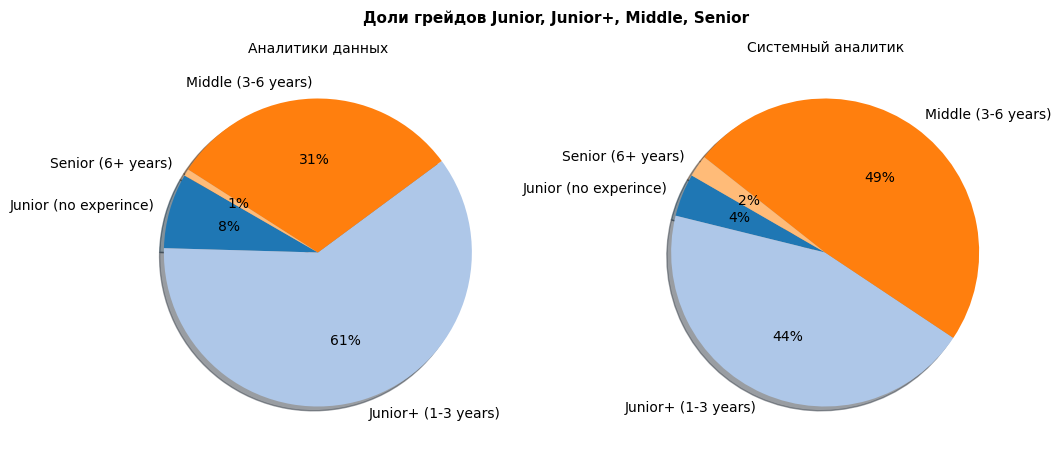

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Сформируем поле для диаграмм


ax[0].pie(d_a,
          labels= [lbl for lbl, value in d_a.items()],
          shadow=True,
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10},
          colors=sns.color_palette('tab20'))
ax[0].set_title('Аналитики данных', fontsize=10, fontweight='normal')
# Построим круговую диаграмму по аналитикам данных

ax[1].pie(s_a,
       labels= [lbl for lbl, value in s_a.items()],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10},
       colors=sns.color_palette('tab20'))
ax[1].set_title('Системный аналитик', fontsize=10, fontweight='normal')
# Построим круговую диаграмму для Системных аналитиков

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=11, fontweight='bold')
plt.show()

Основная масса вакансий у аналитика данных - это уровень Junior+ (61%) и Middle (31%). У системного аналитика количество вакансий по уровню Middle на первом месте (49%), затем Junior+ (44%)

**Типичное место работы для Аналитика данных и Системного аналитика**

**Найдем Топ-работодателей по числу вакансий**

In [45]:
value_list_employer = list(set(all_data['employer'].unique()))
sorted(value_list_employer)

['1C-Медицина-Регион',
 '1С',
 '2050.Лаб',
 '2ГИС',
 '3Logic Group',
 '42',
 '4people',
 '7RedLines',
 '7тек',
 'A-hiring',
 'A2SEVEN',
 'ABCstaff',
 'ADV Project Ltd',
 'ADV/web-engineering',
 'ADVANCE AUTO',
 'ADVANTA',
 'AFFINAGE',
 'AGAMA IT Group',
 'AISA',
 'AMBER',
 'AMarkets',
 'ANCOR',
 'AUXO (Атос АйТи Солюшенс энд Сервисез)',
 'AVO.UZ',
 'AWATERA',
 'AWG',
 'Abi',
 'Adequo',
 'AldanDev',
 'AlfaBit',
 'AliExpress',
 'Amex Development',
 'Antal Talent',
 'Any Service',
 'AppMagic',
 'Appie.tech',
 'Apple Wild',
 'Aramco Innovations',
 'Aston',
 'AutoDistribution Russia',
 'Avalon-IT',
 'Avanpost',
 'Axenix (ранее Accenture)',
 'B2B-Center',
 'B2Broker',
 'BAUM',
 'BI.ZONE',
 'BIV',
 'BND LLC',
 'BORK',
 'BRANDPOL',
 'Bayer',
 'Bazon',
 'Bell Integrator',
 'Bell Integrator Регионы',
 'Bercut',
 'BestDoctor',
 'Between Exchange',
 'Bimeister',
 'Black Shark Recruiting',
 'Blissweb',
 'BlockShop',
 'Bonduelle',
 'BrainHub',
 'CCS (Center of Corporate Solution)',
 'CORE',
 'COZY H

Eсть часть компаний, которые входят в группу компаний или являются дочерними компаниями. Для задачи проекта нам надо выявить топовых работадателей, поэтому создадим столбец, в котором все компании входящие в группу объединим под одним названием.

In [46]:
def standardize_employer(name):
    if 'Сбер' in name:
        return 'СБЕР'
    elif 'Sber' in name:
        return 'СБЕР'
    elif 'СБЕР' in name:
        return 'СБЕР'
    elif 'Альфа' in name:
        return 'Альфа-Групп'
    elif 'Bell Integrator' in name:
        return 'Bell Integrator'
    elif 'Газпром' in name:
        return 'Газпром'
    elif 'Ингосстрах' in name:
        return 'Ингосстрах'
    elif 'DNS' in name:
        return 'DNS'
    elif 'МТС' in name:
        return 'МТС'
    elif 'Почта' in name:
        return 'Почта России'
    elif 'Ростелеком' in name:
        return 'Ростелеком'
    elif 'Яндекс' in name:
        return 'Яндекс'
    elif 'Совкомбанк' in name:
        return 'Совкомбанк'
    elif 'Х5' in name:
        return 'Х5'
    elif 'Этажи' in name:
        return 'Этажи '
    elif 'ВТБ' in name:
        return 'ВТБ' 
    elif 'Газпром' in name:
        return 'Газпром'
    
    # Если ни одно из условий не выполнено, возвращаем исходное имя компании
    
    else:
        return name 

In [47]:
all_data['standardized_employer'] = all_data['employer'].apply(standardize_employer)

In [48]:
da = all_data.loc[all_data['type_vacansy']== 'data_analyst']['standardized_employer'].value_counts().reset_index().head(10)
da['percentage'] = (da['count'] / len(data_da) * 100).round(2)
print(da)

    standardized_employer  count  percentage
0                    СБЕР    264       14.66
1             WILDBERRIES     43        2.39
2                    Ozon     34        1.89
3                     ВТБ     28        1.55
4                      Т1     26        1.44
5  МАГНИТ, Розничная сеть     24        1.33
6                     МТС     23        1.28
7                     DNS     19        1.05
8                    Okko     19        1.05
9                 Газпром     18        1.00


In [49]:
sa = all_data.loc[all_data['type_vacansy']== 'sistem_analyst']['standardized_employer'].value_counts().reset_index().head(10)
sa['percentage'] = (sa['count'] / len(data_sa) * 100).round(2)
print(sa)

       standardized_employer  count  percentage
0                       СБЕР    124        6.48
1                         Т1     80        4.18
2                      Aston     65        3.39
3                 Совкомбанк     38        1.98
4  ПСБ (ПАО «Промсвязьбанк»)     30        1.57
5                 Ростелеком     23        1.20
6                    Selecty     22        1.15
7                     Т-Банк     22        1.15
8                        МТС     20        1.04
9                     билайн     18        0.94


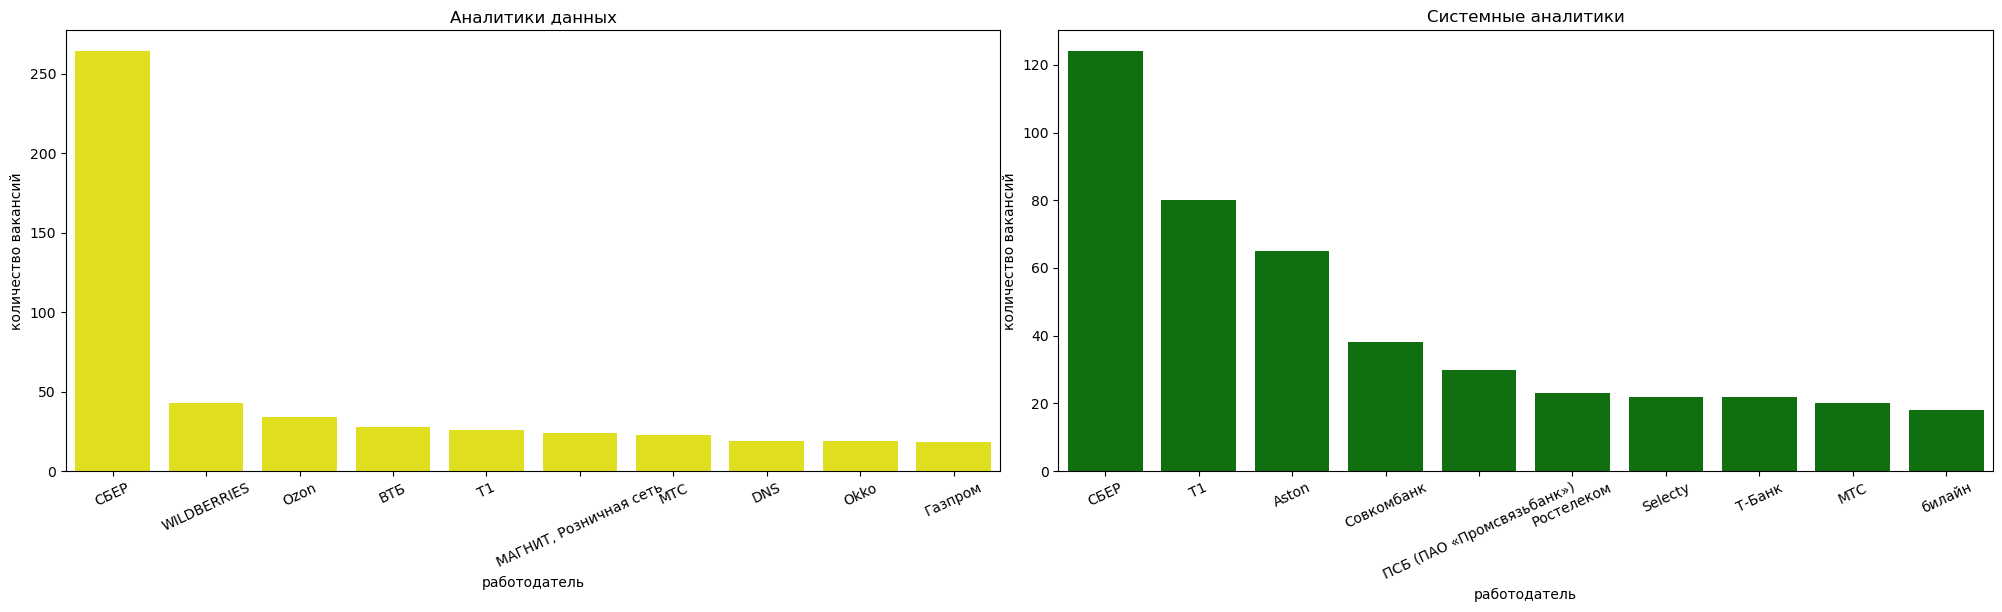

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig. tight_layout ()
# Сформируем поле для графиков

sns.barplot(x='standardized_employer', y='count', data=da, ax=ax[0], color='yellow')
ax[0].set_title("Аналитики данных")
ax[0].set_xlabel('работодатель')
ax[0].set_ylabel('количество вакансий')
ax[0].tick_params(axis='x', labelrotation=25)
# График для аналитиков данных

sns.barplot(x='standardized_employer', y='count', data=sa, ax=ax[1], color='green')
ax[1].set_title("Системные аналитики")
ax[1].set_xlabel('работодатель')
ax[1].set_ylabel('количество вакансий')
ax[1].tick_params(axis='x', labelrotation=25)
# График для системных аналитиков

In [51]:
da_1 = all_data.loc[all_data['type_vacansy']== 'data_analyst']
da_1 = da_1.groupby(['experience', 'standardized_employer']).size().reset_index(name='number_of_vacancies')
da_1 = da_1.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
da_1 = da_1.groupby('experience').head(5)
print (da_1.to_string(index=False))

           experience        standardized_employer  number_of_vacancies
Junior (no experince)                         СБЕР                   13
Junior (no experince)       МАГНИТ, Розничная сеть                    7
Junior (no experince)                          DNS                    6
Junior (no experince) Согласие, страховая компания                    4
Junior (no experince)                        ANCOR                    3
  Junior+ (1-3 years)                         СБЕР                  171
  Junior+ (1-3 years)                          ВТБ                   24
  Junior+ (1-3 years)                         Ozon                   17
  Junior+ (1-3 years)                  WILDBERRIES                   16
  Junior+ (1-3 years)                          МТС                   16
   Middle (3-6 years)                         СБЕР                   80
   Middle (3-6 years)                  WILDBERRIES                   26
   Middle (3-6 years)                           Т1              

In [52]:
sa_1 = all_data.loc[all_data['type_vacansy']== 'sistem_analyst']
sa_1 = sa_1.groupby(['experience', 'standardized_employer']).size().reset_index(name='number_of_vacancies')
sa_1 = sa_1.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
sa_1 = sa_1.groupby('experience').head(5)
print (sa_1.to_string(index=False))

           experience                           standardized_employer  number_of_vacancies
Junior (no experince)                                           Aston                   16
Junior (no experince)                  Компания Апогей (1С-франчайзи)                    8
Junior (no experince)                       TWIGA Communication Group                    5
Junior (no experince)                                          Дунайс                    4
Junior (no experince)                                        Ред Софт                    3
  Junior+ (1-3 years)                                            СБЕР                   54
  Junior+ (1-3 years)                                           Aston                   25
  Junior+ (1-3 years)                                      Совкомбанк                   23
  Junior+ (1-3 years)                                              Т1                   17
  Junior+ (1-3 years)                 Красное & Белое, розничная сеть                   16

Вывод:
1. Топовым работодателем как для системных аналитиков, так и для аналитиков данных, выступает Сбер.
2. Аналитик данных по грейдам. Для грейдов Junior (no experince), Junior+ (1-3 years), Middle (3-6 years) наибольшее количество вакансий предлагает Сбер. Для Senior (6+ years) - Леруа Мерлен
3. Системный аналитик по грейдам. Для грейдов Junior (no experince) топовый работодатель -  Aston. Junior+ (1-3 years), Middle (3-6 years) наибольшее количество вакансий предлагает Сбер. Для Senior (6+ years) - Т1.

In [53]:
 def calculate_avg_salary(row):
    '''Функция считает среднюю заработную плату на основании двух столбцов salary_from и salary_to'''

    # Извлекаем значения минимальной и максимальной заработной платы из строки
    min_salary = row['salary_from']
    max_salary = row['salary_to']

    # Если оба значения заработной платы отсутствуют, возвращаем NaN
    if pd.isna(min_salary) and pd.isna(max_salary):
        return np.nan
    # Если отсутствует минимальная заработная плата, возвращаем максимальную
    elif pd.isna(min_salary):
        return max_salary
    # Если отсутствует максимальная заработная плата, возвращаем минимальную
    elif pd.isna(max_salary):
        return min_salary
    # Если оба значения присутствуют, рассчитываем и возвращаем среднюю заработную плату
    else:
        return (min_salary + max_salary) / 2
all_data['avg_salary'] = all_data.apply(calculate_avg_salary, axis=1)


In [54]:
da_1 = all_data.loc[all_data['type_vacansy']== 'data_analyst']
# Создание сводной таблицы с данными о зарплате по опыту
salary_da = da_1.pivot_table(
    index=['experience'], values=['avg_salary'], aggfunc=['mean', 'median', 'count']
).reset_index()
salary_da.columns = salary_da.columns.droplevel(1)
salary_da ['mean'] = salary_da ['mean'].round()
print(salary_da.to_string(index=False))


           experience     mean   median  count
Junior (no experince)  69570.0  69000.0     66
  Junior+ (1-3 years) 110081.0 100000.0    255
   Middle (3-6 years) 200177.0 180000.0     98
    Senior (6+ years) 191667.0 200000.0      3


In [55]:
sa_1 = all_data.loc[all_data['type_vacansy']== 'sistem_analyst']
# Создание сводной таблицы с данными о зарплате по опыту
salary_sa = sa_1.pivot_table(
    index=['experience'], values=['avg_salary'], aggfunc=['mean', 'median', 'count']
).reset_index()
salary_sa.columns = salary_sa.columns.droplevel(1)
salary_sa ['mean'] = salary_sa ['mean'].round()
print(salary_sa.to_string(index=False))


           experience     mean   median  count
Junior (no experince)  86555.0  75000.0     50
  Junior+ (1-3 years) 152375.0 150000.0    192
   Middle (3-6 years) 248568.0 250000.0    184
    Senior (6+ years) 265014.0 242500.0     10


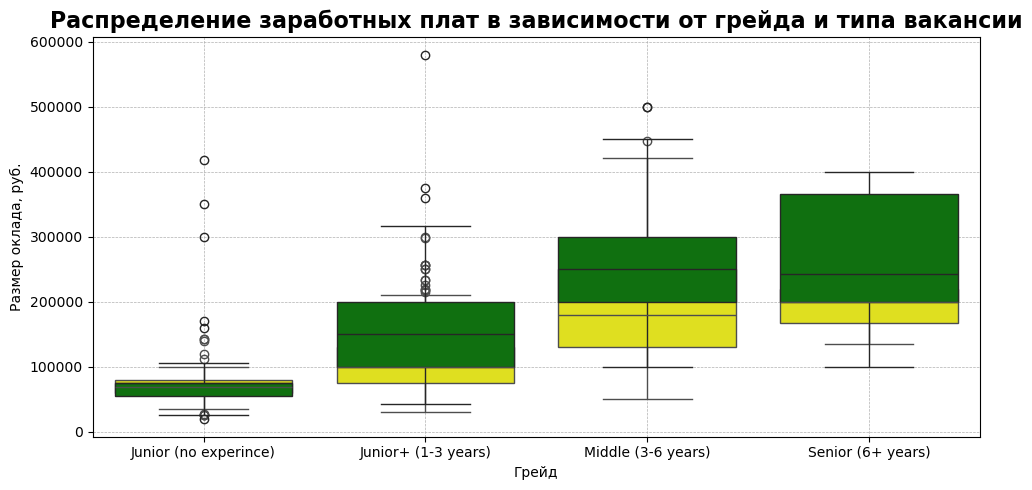

In [56]:
# Создание фигуры и указание ее размера
plt.figure(figsize=(10, 5))

# Построение boxplot для отображения распределения зарплат в зависимости от опыта
sns.boxplot(data=da_1, x="experience", y="avg_salary", color='yellow')
sns.boxplot(data=sa_1, x="experience", y="avg_salary", color='green')

# Установка заголовка и меток осей
plt.title('Распределение заработных плат в зависимости от грейда и типа вакансии', fontsize=16, fontweight='bold')
plt.xlabel('Грейд')
plt.ylabel('Размер оклада, руб.')


# Добавление сетки на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Обеспечение плотной компоновки элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

Вывод:
1. Зарплата системных аналитиков по всем грейдам выше, чем у аналитиков данных.
2. Менее 100 тыс. рублей предлагается специалистам Junior.
3. От 100 тыс. руб. до 200 тыс. руб. - специалистам Junior+
4. От 200 тыс. руб. до 300 тыс. руб. - специалистам Middle
5. Свыше 300 тыс. руб. - специалистам Senior

In [57]:
da_1 = all_data.loc[all_data['type_vacansy']== 'data_analyst']
employment_da = da_1.groupby(['experience', 'employment']).size().reset_index(name='number_of_vacancies')
total_vacancies = employment_da.groupby('experience')['number_of_vacancies'].transform('sum')
employment_da['percentage'] = ((
    employment_da['number_of_vacancies'] / total_vacancies
) * 100).round(2)
employment_da = employment_da.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
print (employment_da.to_string(index=False))

           experience          employment  number_of_vacancies  percentage
Junior (no experince)    Полная занятость                  123       86.62
Junior (no experince)          Стажировка                   15       10.56
Junior (no experince) Частичная занятость                    3        2.11
Junior (no experince)    Проектная работа                    1        0.70
  Junior+ (1-3 years)    Полная занятость                 1079       98.90
  Junior+ (1-3 years) Частичная занятость                    8        0.73
  Junior+ (1-3 years)    Проектная работа                    3        0.27
  Junior+ (1-3 years)          Стажировка                    1        0.09
   Middle (3-6 years)    Полная занятость                  549       98.92
   Middle (3-6 years) Частичная занятость                    5        0.90
   Middle (3-6 years)    Проектная работа                    1        0.18
    Senior (6+ years)    Полная занятость                   13      100.00


In [58]:
sa_1 = all_data.loc[all_data['type_vacansy']== 'sistem_analyst']
employment_sa = sa_1.groupby(['experience', 'employment']).size().reset_index(name='number_of_vacancies')
total_vacancies = employment_sa.groupby('experience')['number_of_vacancies'].transform('sum')
employment_sa['percentage'] = ((
    employment_sa['number_of_vacancies'] / total_vacancies
) * 100).round(2)
employment_sa = employment_sa.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
print (employment_sa.to_string(index=False))

           experience          employment  number_of_vacancies  percentage
Junior (no experince)    Полная занятость                   56       65.12
Junior (no experince)          Стажировка                   29       33.72
Junior (no experince) Частичная занятость                    1        1.16
  Junior+ (1-3 years)    Полная занятость                  851       99.88
  Junior+ (1-3 years)    Проектная работа                    1        0.12
   Middle (3-6 years)    Полная занятость                  926       99.25
   Middle (3-6 years) Частичная занятость                    5        0.54
   Middle (3-6 years)    Проектная работа                    2        0.21
    Senior (6+ years)    Полная занятость                   44      100.00


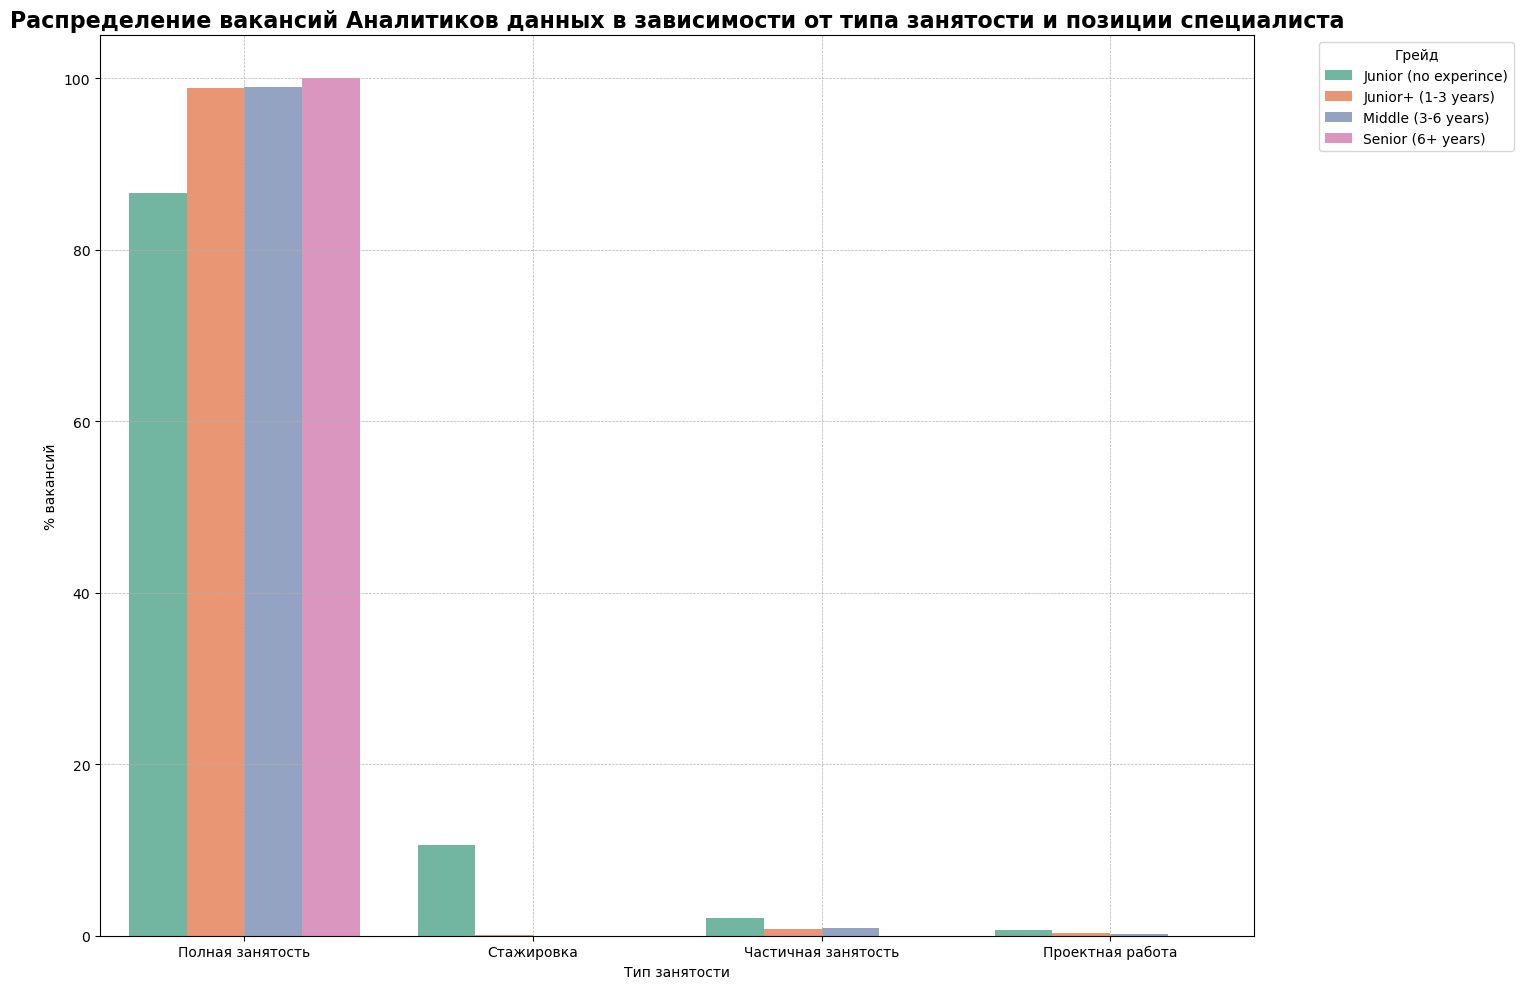

In [59]:
# Создание фигуры и указание ее размера
plt.figure(figsize=(15, 10))

# Построение столбчатой диаграммы для распределения вакансий по расписанию и опыту
sns.barplot(
    x='employment', y='percentage', hue='experience',
    data=employment_da, palette='Set2'
)

# Установка заголовка и меток осей
plt.title(
    'Распределение вакансий Аналитиков данных в зависимости от типа занятости и позиции специалиста',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Тип занятости')
plt.ylabel('% вакансий')

# Добавление легенды
plt.legend(title='Грейд', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавление сетки на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Обеспечение плотной компоновки элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

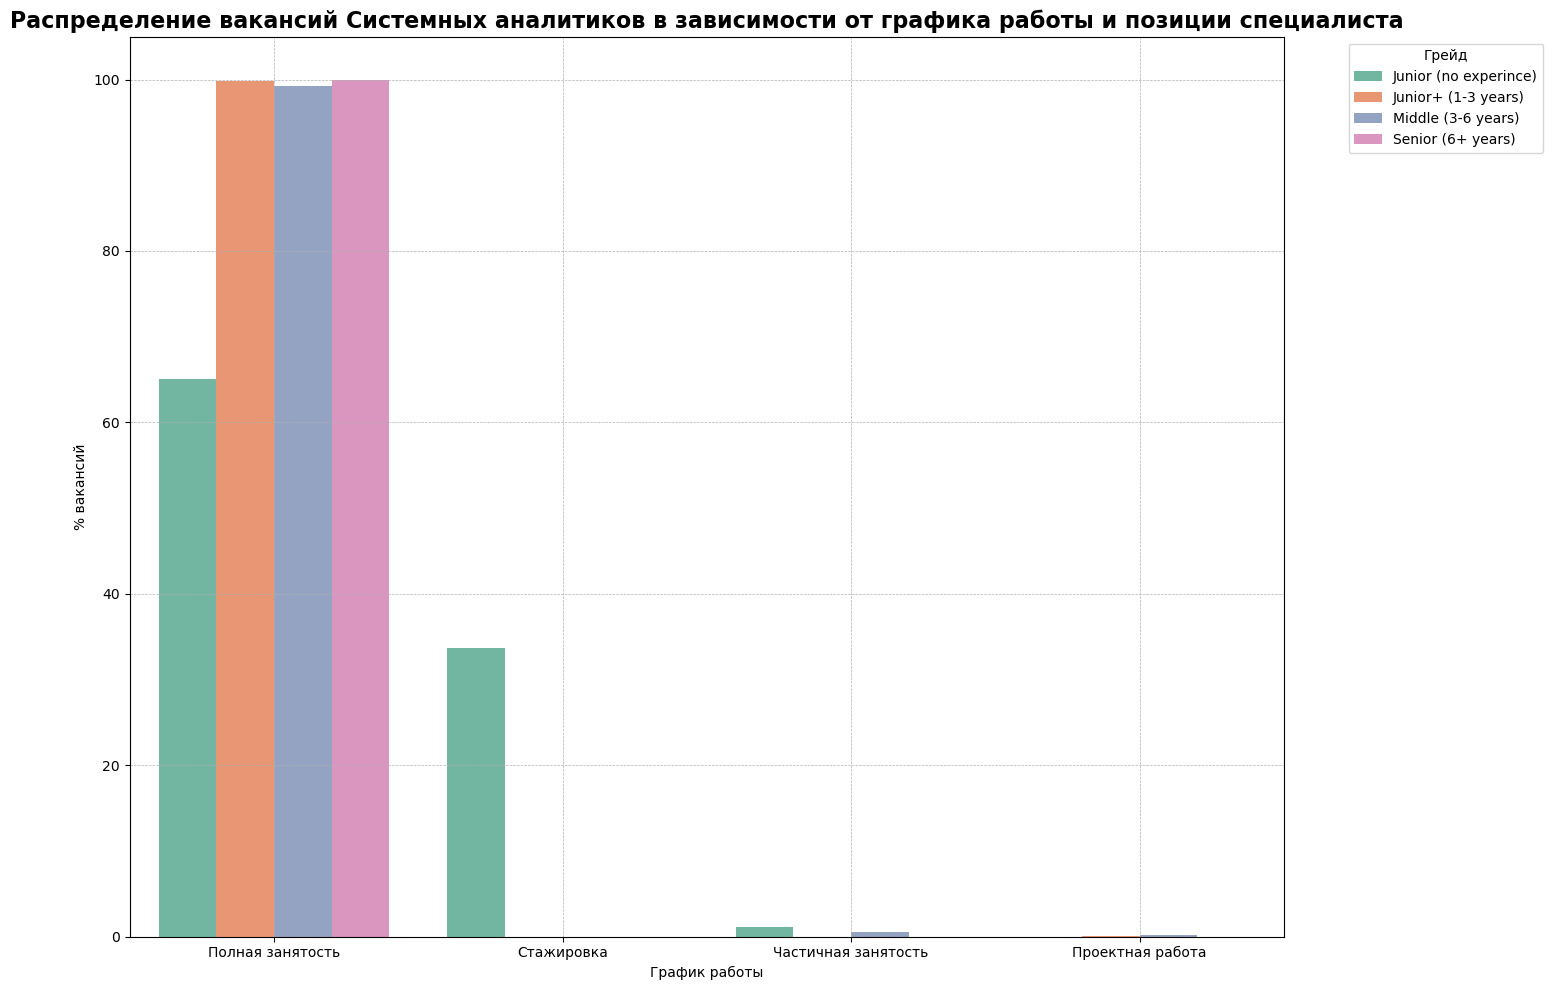

In [60]:
# Создание фигуры и указание ее размера
plt.figure(figsize=(15, 10))

# Построение столбчатой диаграммы для распределения вакансий по расписанию и опыту
sns.barplot(
    x='employment', y='percentage', hue='experience',
    data=employment_sa, palette='Set2'
)

# Установка заголовка и меток осей
plt.title(
    'Распределение вакансий Системных аналитиков в зависимости от графика работы и позиции специалиста',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('График работы')
plt.ylabel('% вакансий')

# Добавление легенды
plt.legend(title='Грейд', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавление сетки на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Обеспечение плотной компоновки элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

Вывод: приоритетный тип занятости в вакансиях как для аналитиков данных, так и для системных аналитиков - полная занятость для всех грейдов. Для Junior актуальна стажировка.  

In [61]:
da_1 = all_data.loc[all_data['type_vacansy']== 'data_analyst']
schedule_da = da_1.groupby(['experience', 'schedule']).size().reset_index(name='number_of_vacancies')
total_vacancies = schedule_da.groupby('experience')['number_of_vacancies'].transform('sum')
schedule_da['percentage'] = ((
    schedule_da['number_of_vacancies'] / total_vacancies
) * 100).round(2)
schedule_da = schedule_da.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
print (schedule_da.to_string(index=False))

           experience         schedule  number_of_vacancies  percentage
Junior (no experince)      Полный день                  122       85.92
Junior (no experince) Удаленная работа                   15       10.56
Junior (no experince)    Гибкий график                    3        2.11
Junior (no experince)   Сменный график                    2        1.41
  Junior+ (1-3 years)      Полный день                  905       82.95
  Junior+ (1-3 years) Удаленная работа                  158       14.48
  Junior+ (1-3 years)    Гибкий график                   21        1.92
  Junior+ (1-3 years)   Сменный график                    7        0.64
   Middle (3-6 years)      Полный день                  406       73.15
   Middle (3-6 years) Удаленная работа                  132       23.78
   Middle (3-6 years)    Гибкий график                   17        3.06
    Senior (6+ years)      Полный день                    8       61.54
    Senior (6+ years) Удаленная работа                    5     

In [62]:
sa_1 = all_data.loc[all_data['type_vacansy']== 'sistem_analyst']
schedule_sa = sa_1.groupby(['experience', 'schedule']).size().reset_index(name='number_of_vacancies')
total_vacancies = schedule_sa.groupby('experience')['number_of_vacancies'].transform('sum')
schedule_sa['percentage'] = ((
    schedule_sa['number_of_vacancies'] / total_vacancies
) * 100).round(2)
schedule_sa = schedule_sa.sort_values(['experience', 'number_of_vacancies'], ascending=[True, False])
print (schedule_sa.to_string(index=False))

           experience         schedule  number_of_vacancies  percentage
Junior (no experince)      Полный день                   51       59.30
Junior (no experince) Удаленная работа                   29       33.72
Junior (no experince)    Гибкий график                    6        6.98
  Junior+ (1-3 years)      Полный день                  553       64.91
  Junior+ (1-3 years) Удаленная работа                  263       30.87
  Junior+ (1-3 years)    Гибкий график                   36        4.23
   Middle (3-6 years)      Полный день                  574       61.52
   Middle (3-6 years) Удаленная работа                  341       36.55
   Middle (3-6 years)    Гибкий график                   17        1.82
   Middle (3-6 years)   Сменный график                    1        0.11
    Senior (6+ years)      Полный день                   25       56.82
    Senior (6+ years) Удаленная работа                   17       38.64
    Senior (6+ years)    Гибкий график                    2     

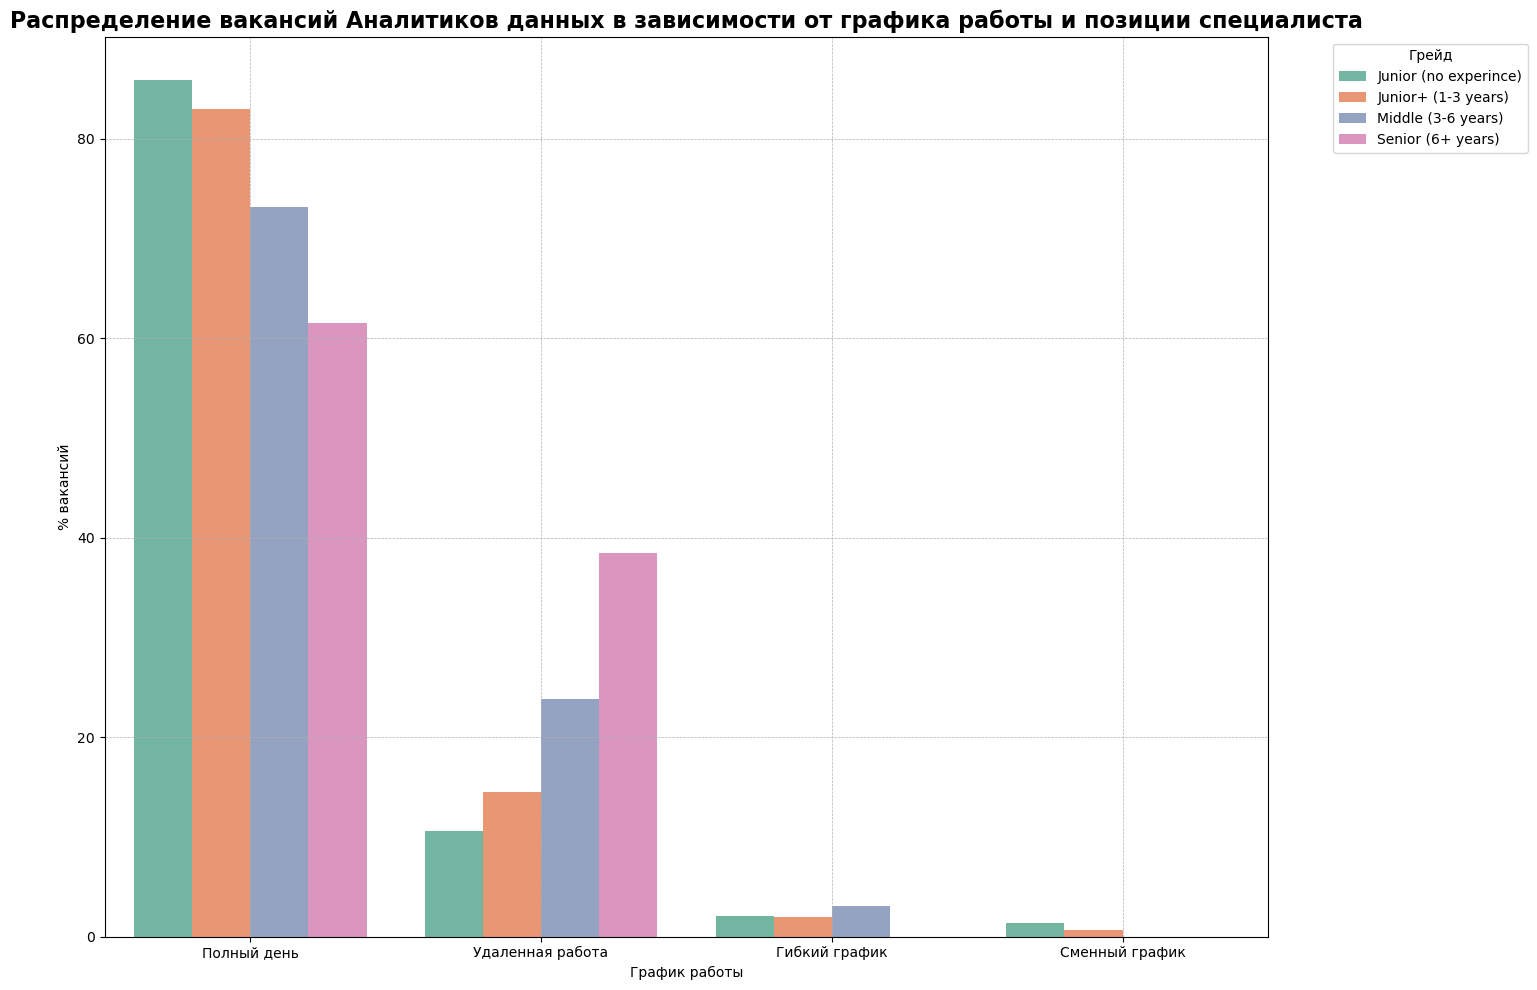

In [63]:
# Создание фигуры и указание ее размера
plt.figure(figsize=(15, 10))

# Построение столбчатой диаграммы для распределения вакансий по расписанию и опыту
sns.barplot(
    x='schedule', y='percentage', hue='experience',
    data=schedule_da, palette='Set2'
)

# Установка заголовка и меток осей
plt.title(
    'Распределение вакансий Аналитиков данных в зависимости от графика работы и позиции специалиста',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('График работы')
plt.ylabel('% вакансий')

# Добавление легенды
plt.legend(title='Грейд', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавление сетки на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Обеспечение плотной компоновки элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

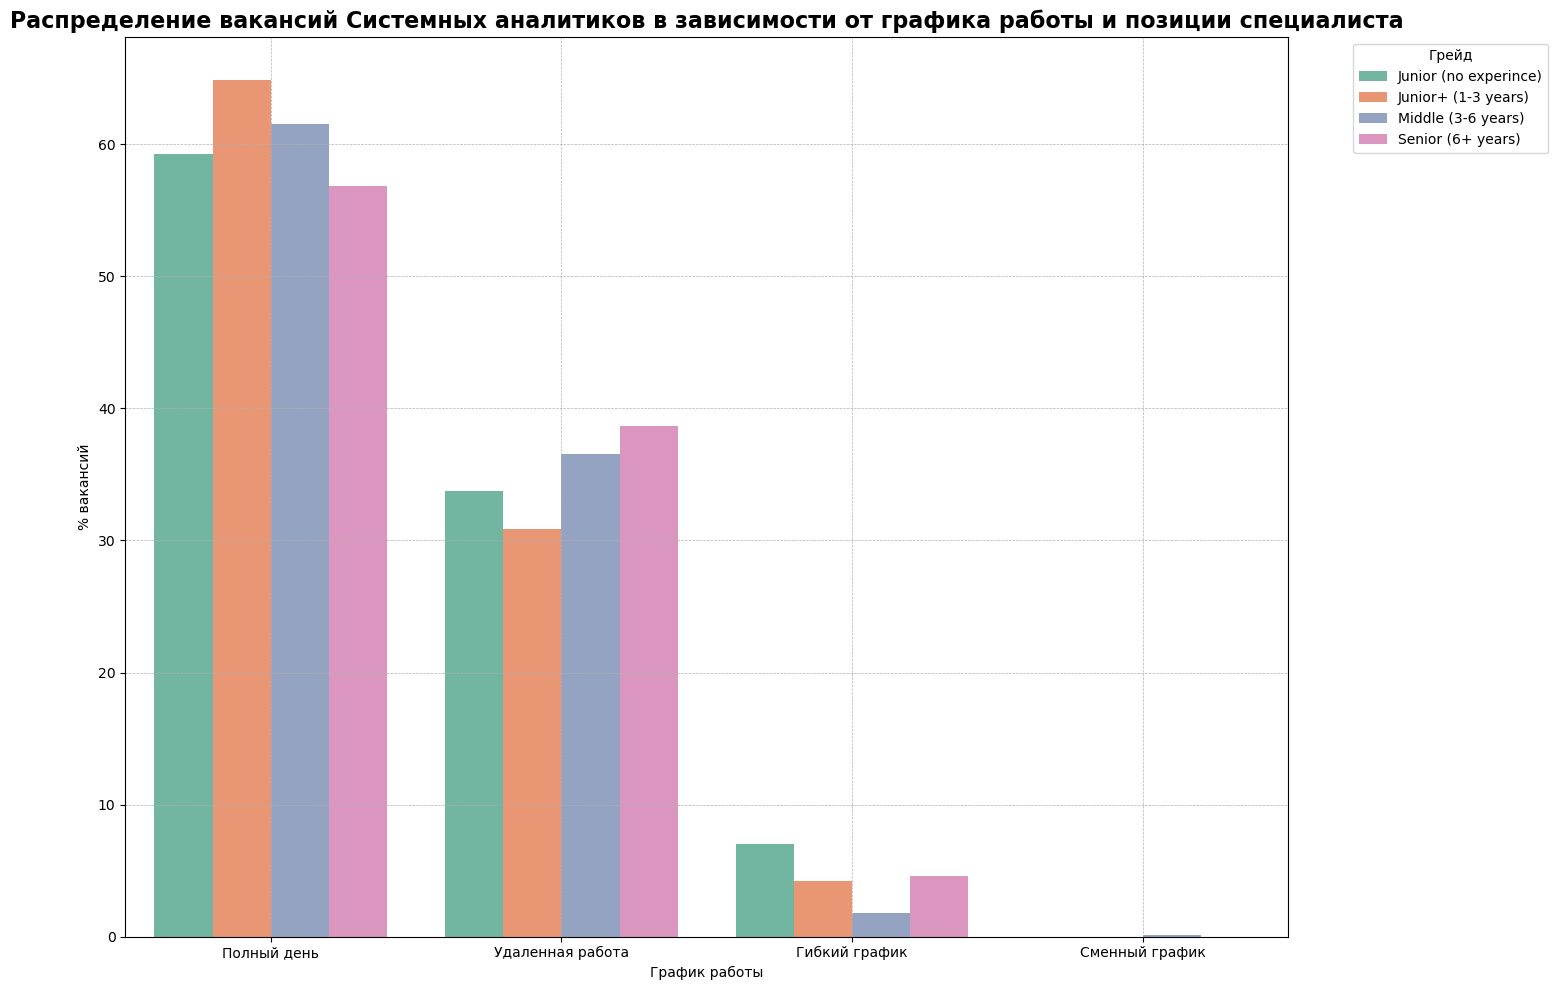

In [64]:
# Создание фигуры и указание ее размера
plt.figure(figsize=(15, 10))

# Построение столбчатой диаграммы для распределения вакансий по расписанию и опыту
sns.barplot(
    x='schedule', y='percentage', hue='experience',
    data=schedule_sa, palette='Set2'
)

# Установка заголовка и меток осей
plt.title(
    'Распределение вакансий Системных аналитиков в зависимости от графика работы и позиции специалиста',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('График работы')
plt.ylabel('% вакансий')

# Добавление легенды
plt.legend(title='Грейд', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавление сетки на график
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Обеспечение плотной компоновки элементов графика
plt.tight_layout()

# Отображение графика
plt.show()

Вывод: для вакансий и аналитиков данных и системных аналитиков приоритетный график работы - полный день для всех грейдов. Для вакансий системных аналитиков график удаленной работы более востребован, чем для аналитиков данных. 

### Установим какие навыки спрашивают чаще —  "твердые' или 'мягкие", а также обозначим к какому грейду и к какой специальности требований больше.

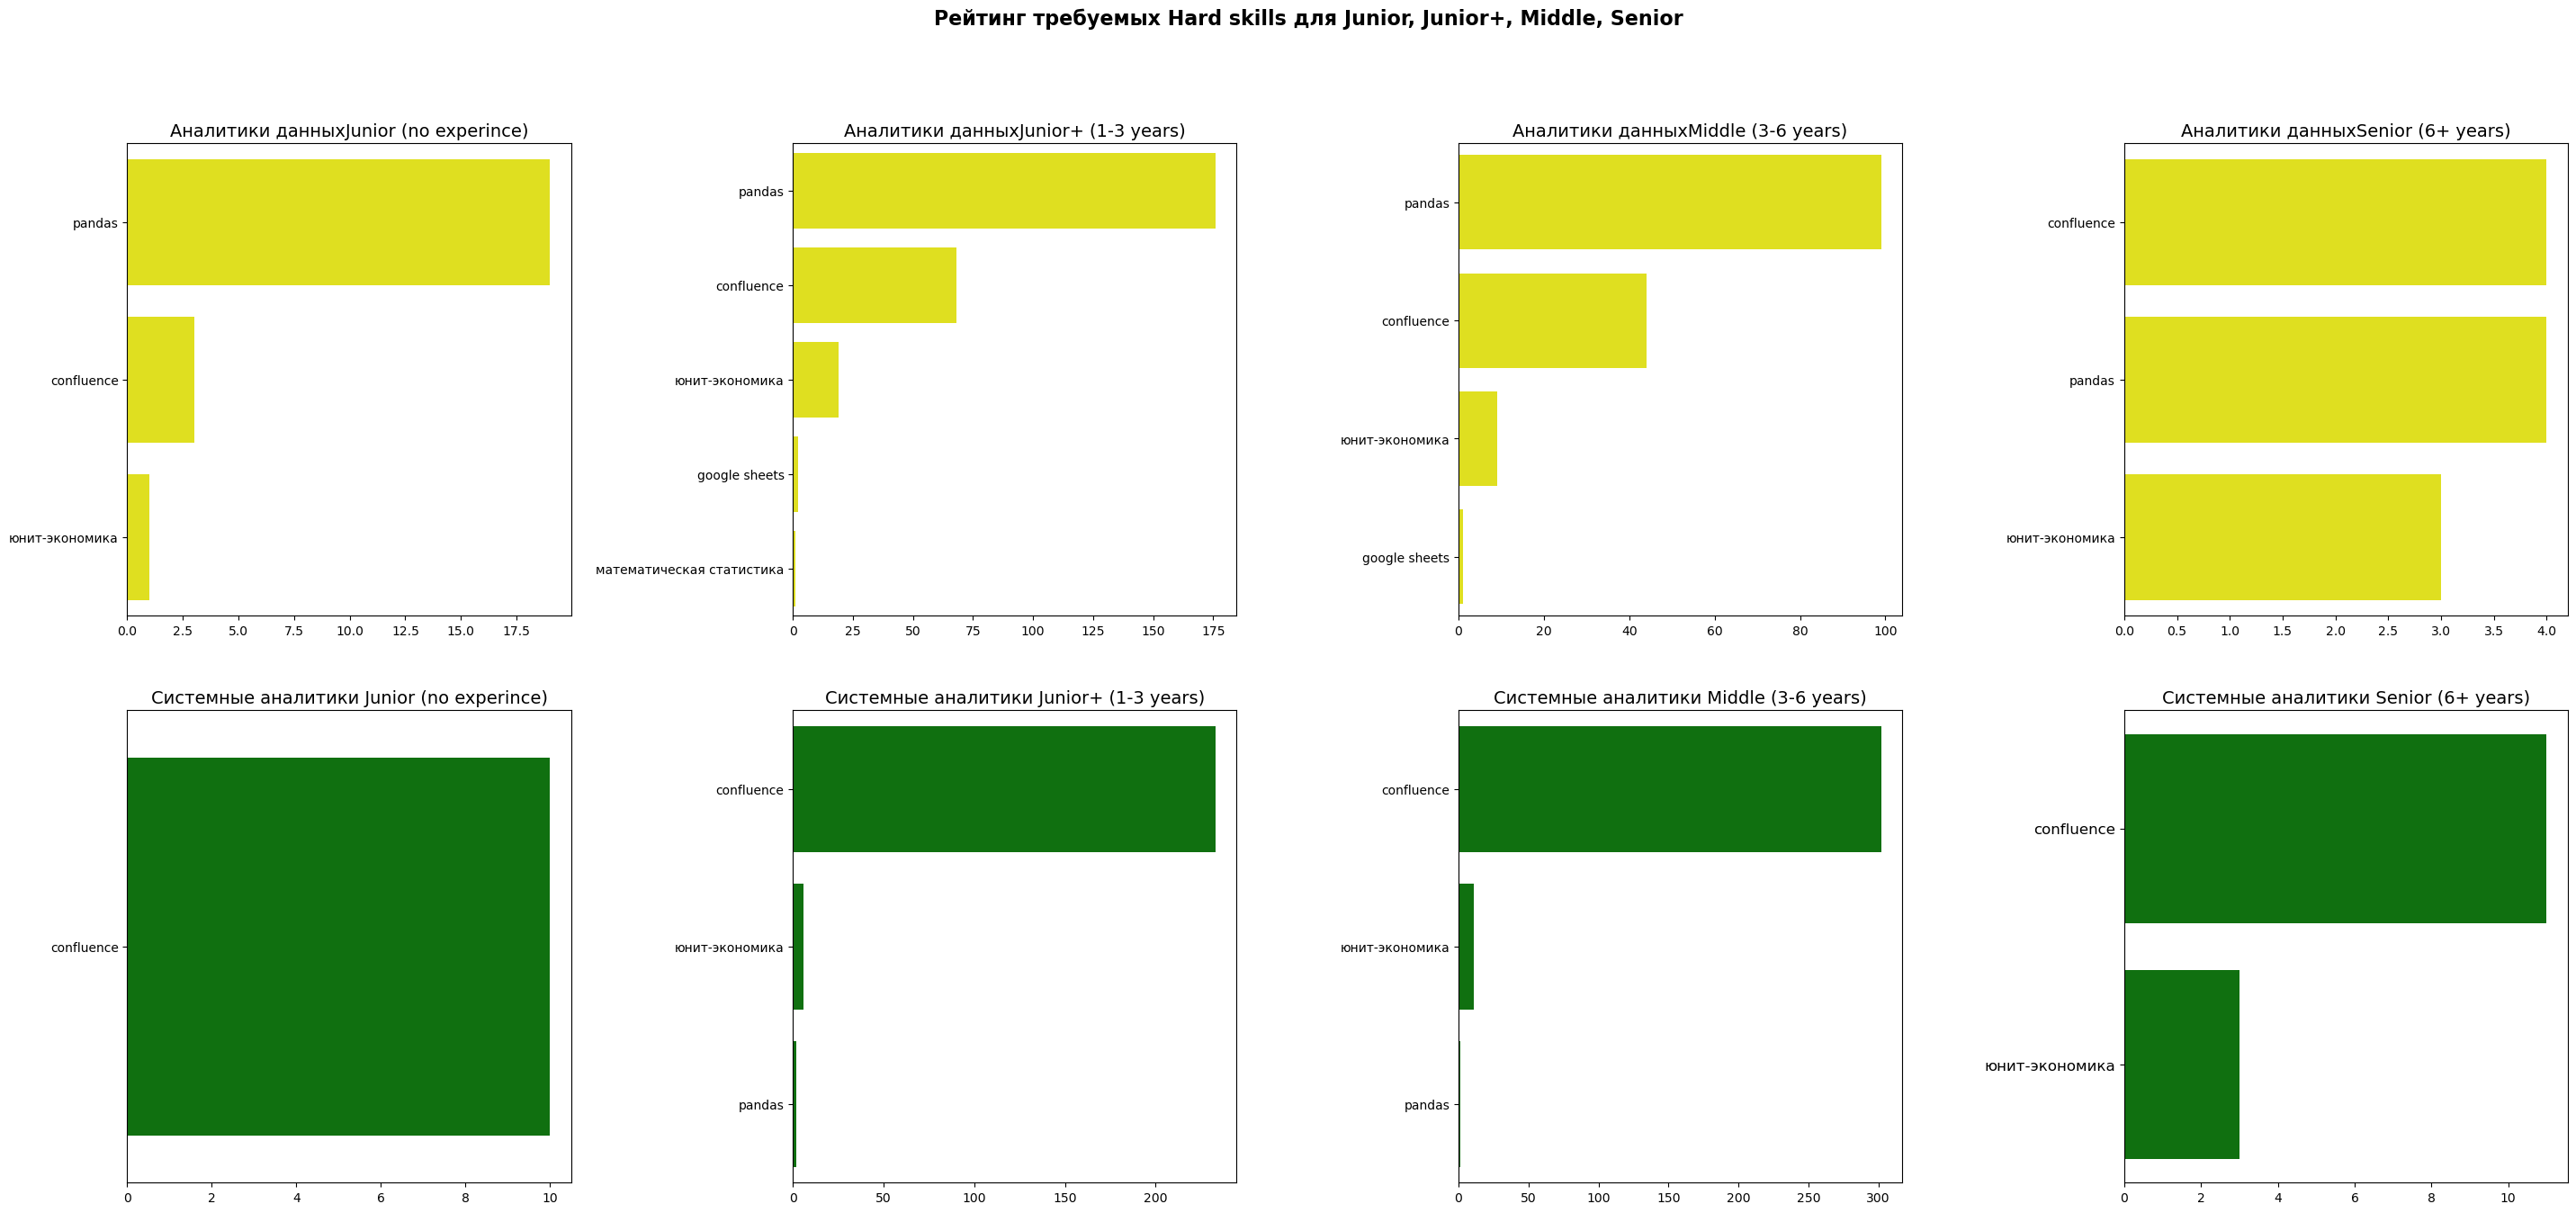

In [66]:

all_skills = all_data[['id',
                         'type_vacansy',
                         'experience',
                         'hard_skills_from_description'
                         ]].reset_index(drop=True)
# Подготовка и составление рейтинга востребованных Хард скилов


all_skills['hard_skills_from_description'] = all_skills['hard_skills_from_description'].str.split(',')
# преобразование перечня скилов в список

all_skills = all_skills.explode('hard_skills_from_description')
# Вывод кадого скила отдельной строкой

all_skills['hard_skills_from_description'] = (all_skills['hard_skills_from_description']
                                                 .str.lower().str.strip())
# приодим данные к нижнему регистру и убираем пробелы


fig, ax = plt.subplots(2, 4, figsize=(35, 15))
plt.suptitle('Рейтинг требуемых Hard skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')
# Поле для диаграмм

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'data_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'sistem_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)


  sns.barplot(x='count', y='hard_skills_from_description', data=da_skills, ax=ax[0, i], color='yellow')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')
  # График для аналитиков данных

  sns.barplot(x='count', y='hard_skills_from_description', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()


# График для Системных аналитиков

Вывод: для аналитиков данных самый основной требуемый "твердый" навык - это Pandas. Для системных аналитиков - это система Confluence

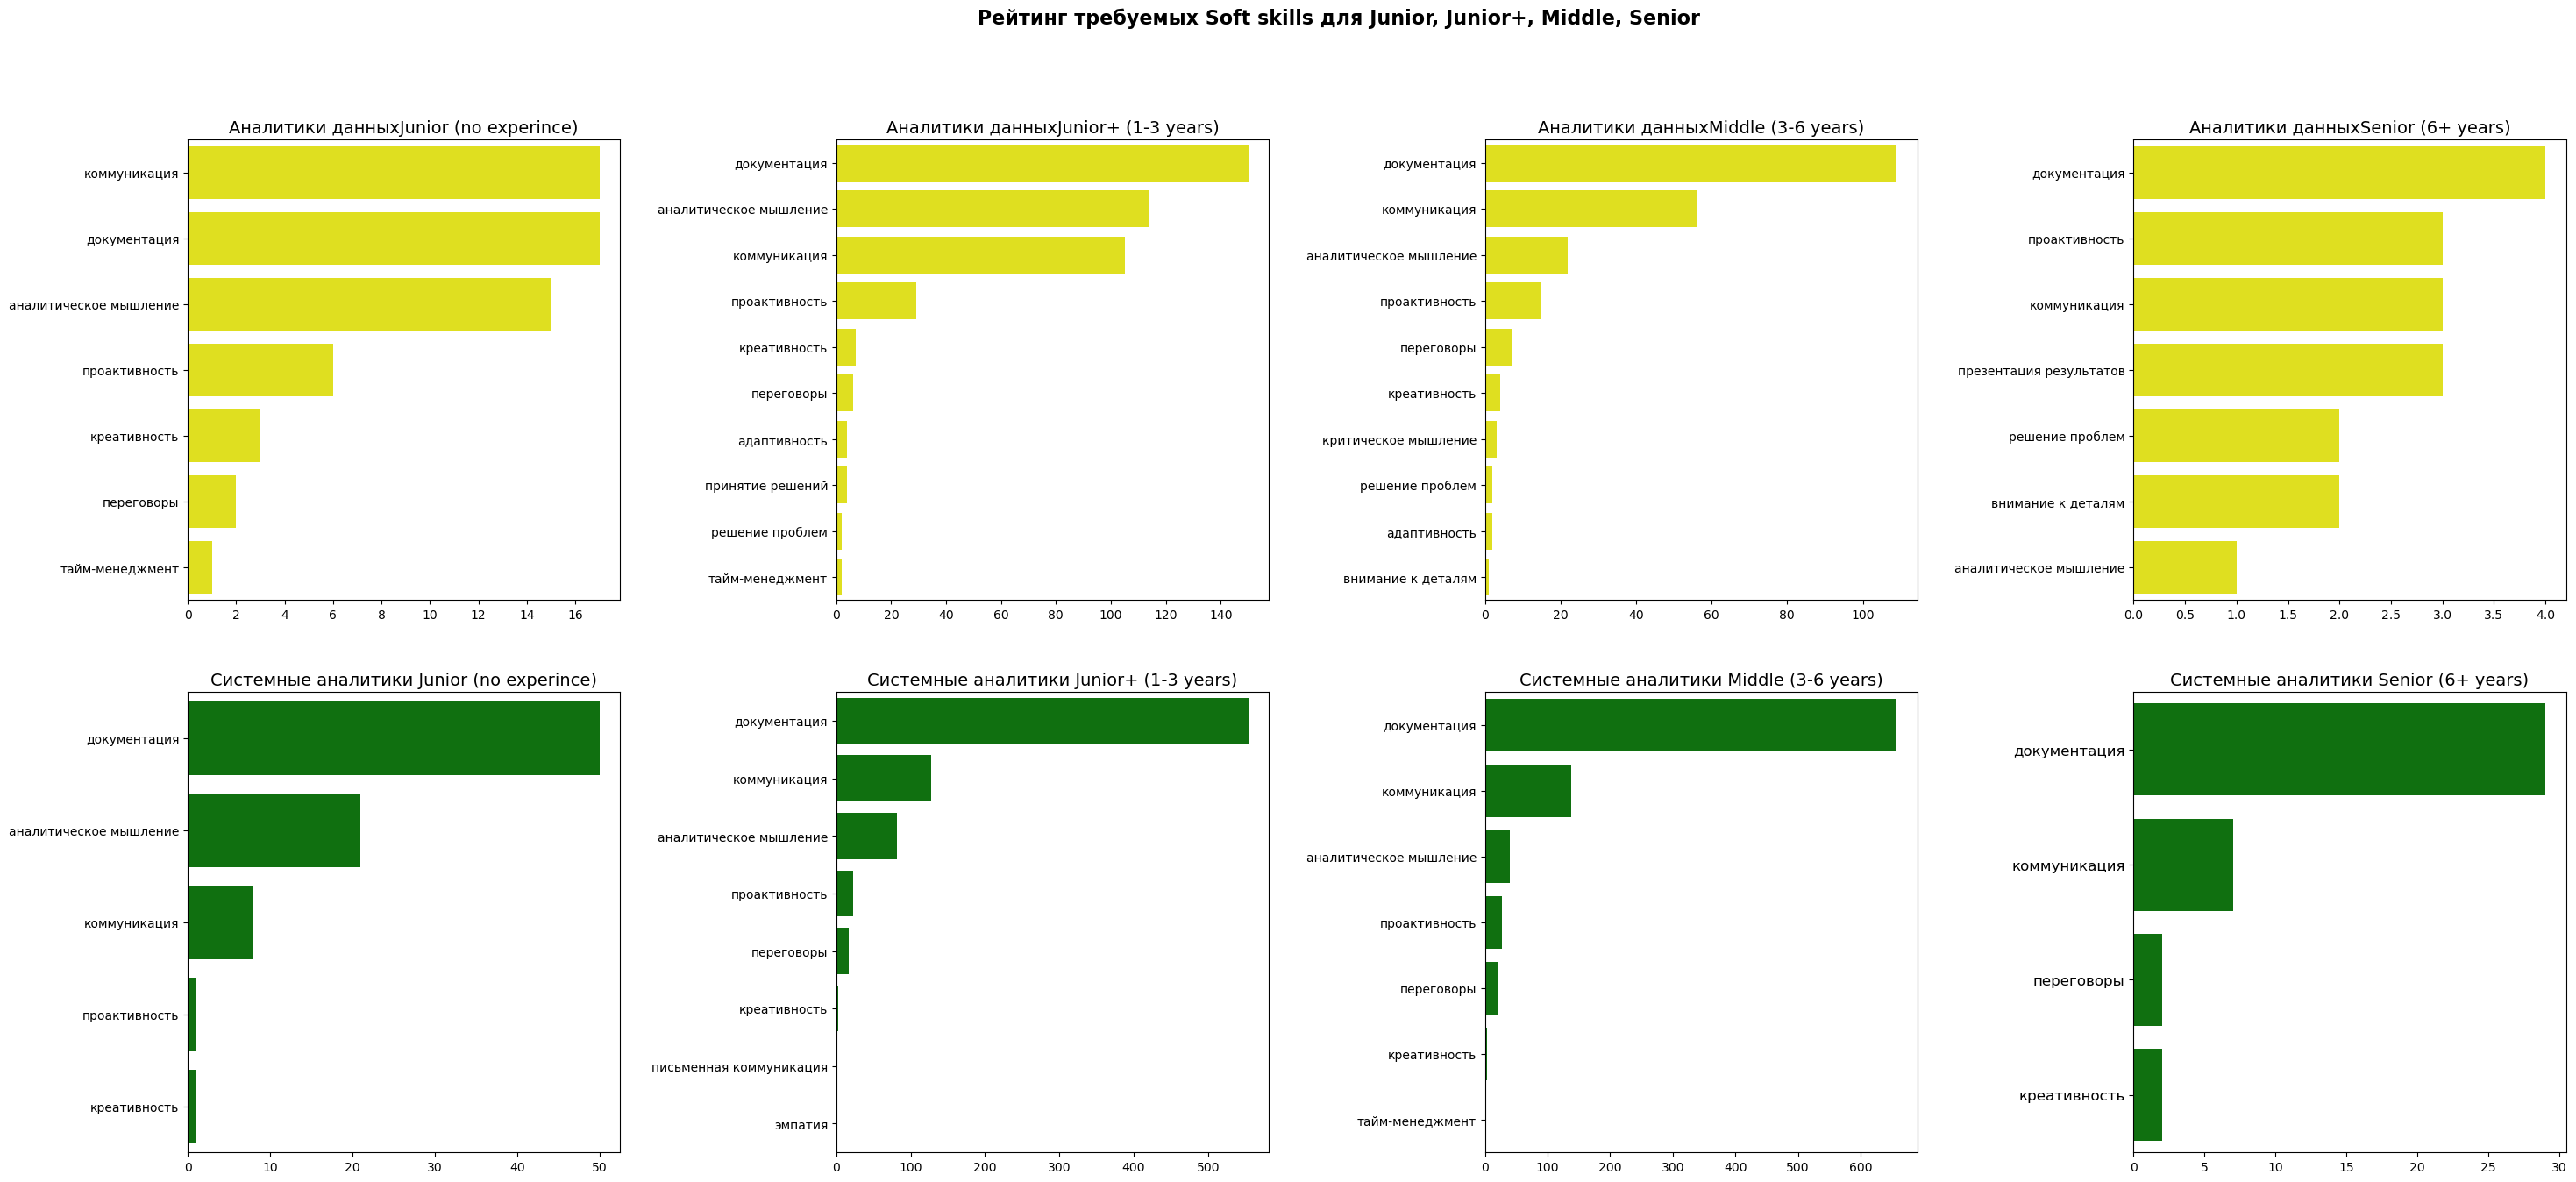

In [67]:

all_skills = all_data[['id',
                         'type_vacansy',
                         'experience',
                         'soft_skills_from_description'
                         ]].reset_index(drop=True)
# Подготовка и составление рейтинга востребованных Хард скилов


all_skills['soft_skills_from_description'] = all_skills['soft_skills_from_description'].str.split(',')
# преобразование перечня скилов в список

all_skills = all_skills.explode('soft_skills_from_description')
# Вывод кадого скила отдельной строкой

all_skills['soft_skills_from_description'] = (all_skills['soft_skills_from_description']
                                                 .str.lower().str.strip())
# приодим данные к нижнему регистру и убираем пробелы


fig, ax = plt.subplots(2, 4, figsize=(35, 15))
plt.suptitle('Рейтинг требуемых Soft skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')
# Поле для диаграмм

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'data_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'sistem_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='soft_skills_from_description', data=da_skills, ax=ax[0, i], color='yellow')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')



  sns.barplot(x='count', y='soft_skills_from_description', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

  # График для системных аналитиков

Вывод: для всех аналитиков очень важны такие "мягкие" навыки, как документация, коммуникация и аналитическое мышление. Для аналитиков данных уровня Senior также важны такие навыки, как презентация результатов, решение проблем, внимание к деталям.  Для системных аналитиков уровня Senior важны такие навыки, как умение вести переговоры и креативность.  

### Желаемые кандидаты на вакансии Аналитик данных и Системных аналитиков по следующим параметрам: самые важные hard-skils и soft-skils. 

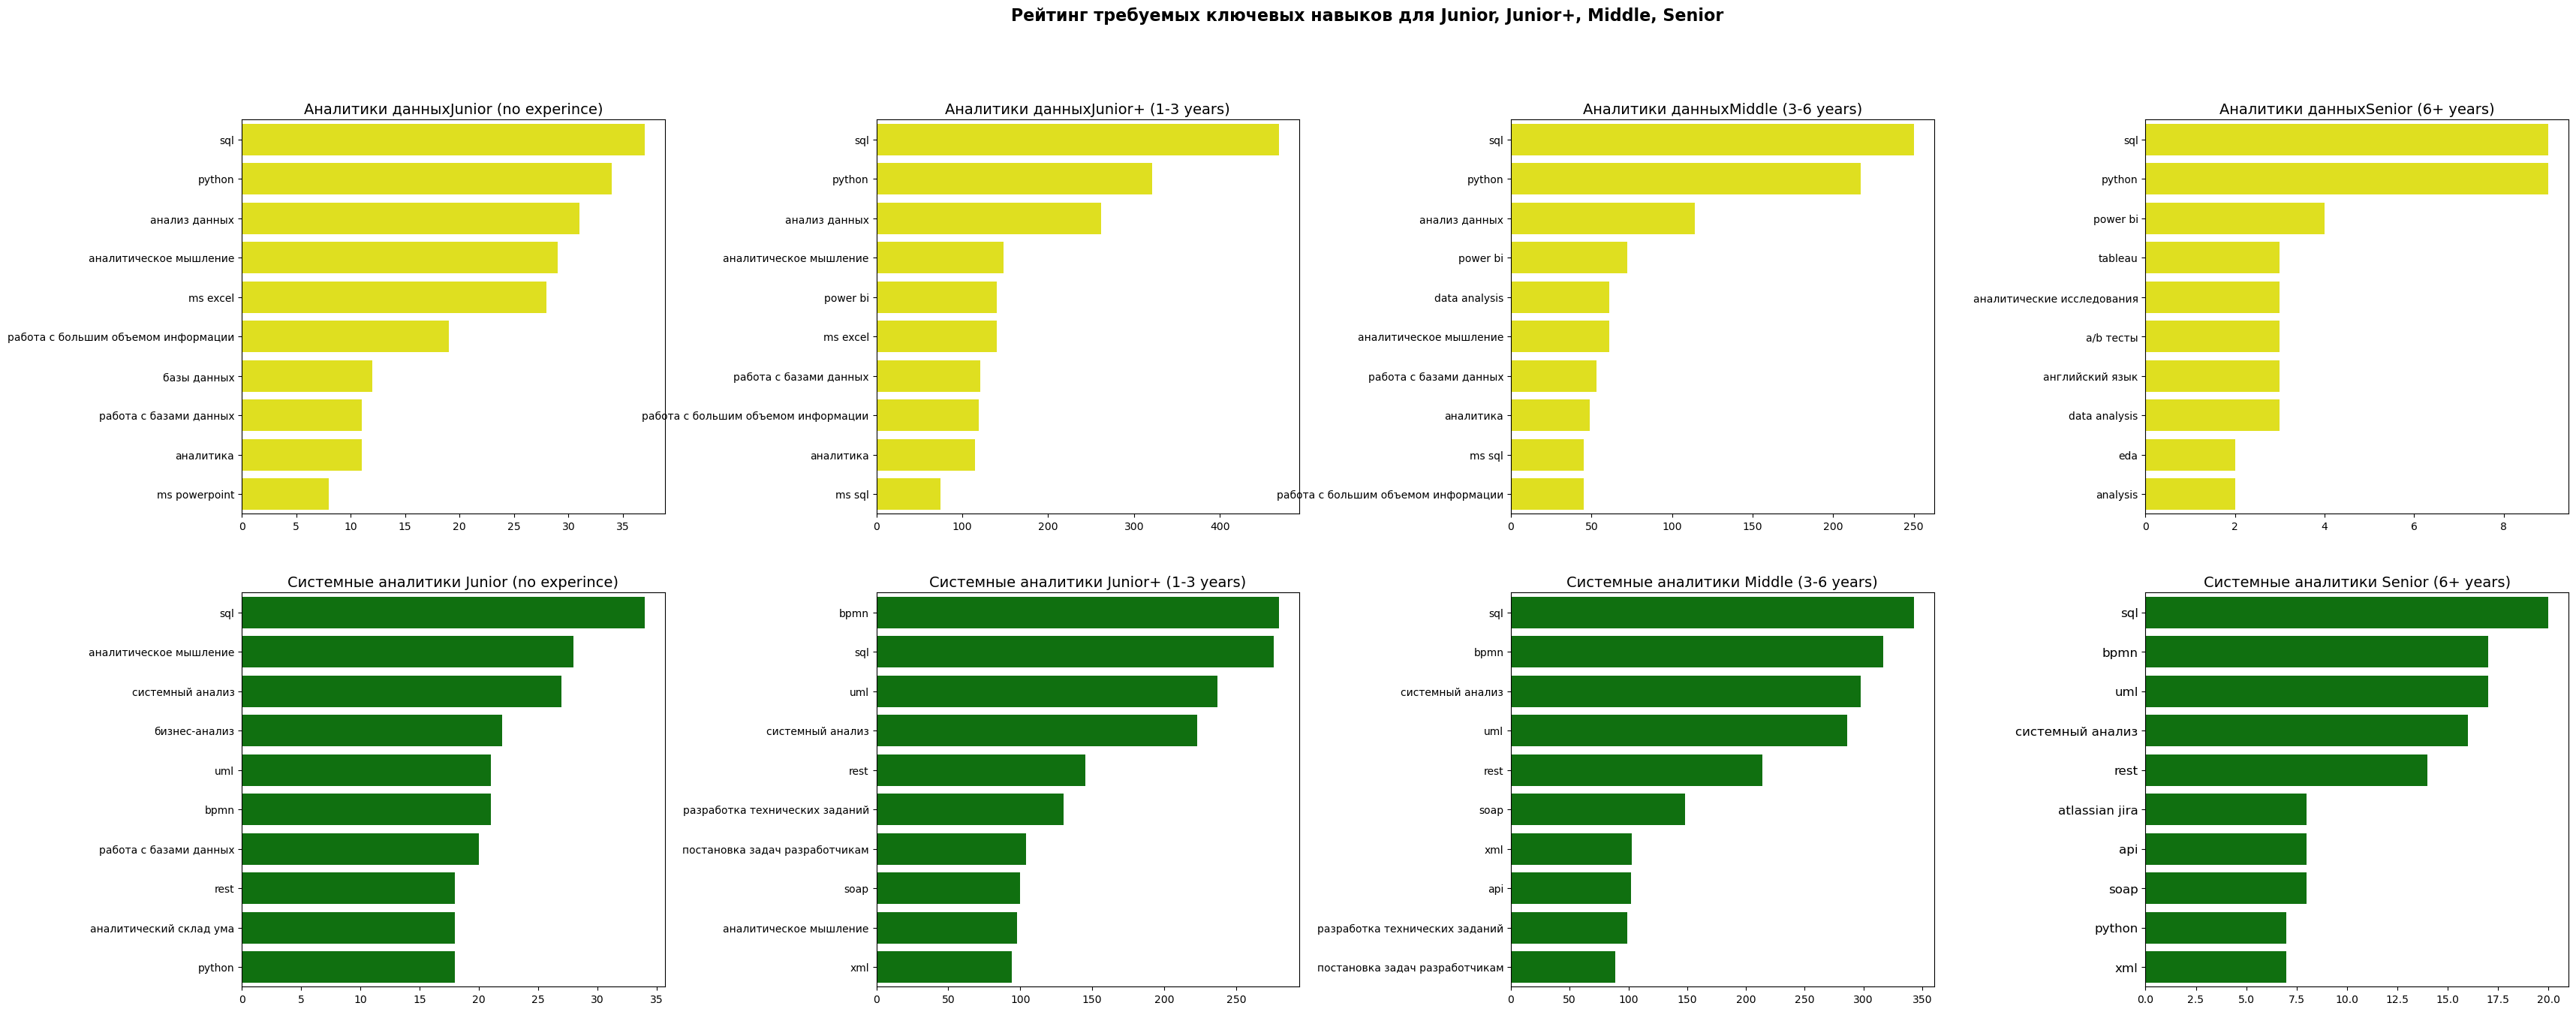

In [68]:

all_skills = all_data[['id',
                         'type_vacansy',
                         'experience',
                         'key_skills_from_key_skills_field'
                         ]].reset_index(drop=True)
# Подготовка и составление рейтинга востребованных Хард скилов


all_skills['key_skills_from_key_skills_field'] = all_skills['key_skills_from_key_skills_field'].str.split(',')
# преобразование перечня скилов в список

all_skills = all_skills.explode('key_skills_from_key_skills_field')
# Вывод кадого скила отдельной строкой

all_skills['key_skills_from_key_skills_field'] = (all_skills['key_skills_from_key_skills_field']
                                                 .str.lower().str.strip())
# приодим данные к нижнему регистру и убираем пробелы


fig, ax = plt.subplots(2, 4, figsize=(40, 15))
plt.suptitle('Рейтинг требуемых ключевых навыков для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')
# Поле для диаграмм

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'data_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['type_vacansy'] == 'sistem_analyst') & (all_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)


  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=da_skills, ax=ax[0, i], color='yellow')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

 # График для аналитиков данных

  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()
 # График для системных аналитиков


Вывод. Ключевые навыки для соискателей вакансий Аналитик данных- это Pyton, SQL, анализ данных. Для уровня Middle и Senior необходимы также владение инструментами Power BI и Tableаu. Ключевые навыки для соискателей вакансий Системный аналитик - это SQL, аналитическое мышление, bpmn, uml. 

### **Общий вывод**

Топовым работодателем для аналитика данных и системного аналитика выступает Сбер.  Далее по количеству вакансий следуют Т1, Aston, Wildberries и Ozon.

Больше всего вакансий размещено по Москве, в меньшей степени в Санкт-Петербурге и Екатеринбурге.

В исследовании 4 грейда специалистов: Junior, Junior+, Middle, Senior
Наиболее востребованы специалисты уровня Junior+ с опытом работы 1-3 года и Middle (3-6 лет)

В подавляющем большинстве случаев зарплата не указан

Ключевые навыки SQL и Pyton

**Анализ вакансий по грейдам.**

Основная масса вакансий у аналитика данных - это уровень Junior+ (61%) и Middle (31%). У системного аналитика количество вакансий по уровню Middle на первом месте (49%), затем Junior+ (44%)

Для Аналитика данных по грейдам Junior, Junior+, Middle наибольшее количество вакансий предлагает Сбер. Для Senior - Леруа Мерлен
Для Системного аналитика по грейдам Junior топовый работодатель -  Aston. Для уровня Junior+ , Middle наибольшее количество вакансий предлагает Сбер. Для Senior - Т1.

Зарплата системных аналитиков по всем грейдам выше, чем у аналитиков данных.
 Менее 100 тыс. рублей предлагается специалистам Junior.
 От 100 тыс. руб. до 200 тыс. руб. - специалистам Junior+
 От 200 тыс. руб. до 300 тыс. руб. - специалистам Middle
 Свыше 300 тыс. руб. - специалистам Senior
 
Приоритетный тип занятости в вакансиях как для аналитиков данных, так и для системных аналитиков - полная занятость для всех грейдов. Для Junior актуальна стажировка.

Для вакансий и аналитиков данных и системных аналитиков приоритетный график работы - полный день для всех грейдов. Для вакансий системных аналитиков график удаленной работы более востребован, чем для аналитиков данных. 

Для аналитиков данных самый основной требуемый "твердый" навык - это Pandas. Для системных аналитиков - это система Confluence

Для всех аналитиков очень важны такие "мягкие" навыки, как документация, коммуникация и аналитическое мышление. Для аналитиков данных уровня Senior также важны такие навыки, как презентация результатов, решение проблем, внимание к деталям.  Для системных аналитиков уровня Senior важны такие навыки, как умение вести переговоры и креативность. 

Ключевые навыки для соискателей вакансий Аналитик данных- это Pyton, SQL, анализ данных. Для уровня Middle и Senior необходимы также владение инструментами Power BI и Tableаu. Ключевые навыки для соискателей вакансий Системный аналитик - это SQL, аналитическое мышление, bpmn, uml.on